<a href="https://colab.research.google.com/github/Sakura1711/DAI-Assignment-1/blob/main/dai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,2579
Location,3265
Transaction Date,159


In [ ]:
#Handling missing data:
numerical_cols=[]
categorical_cols=[]
for col in df.columns:
  if df[col].dtype=="object":
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)

for col in numerical_cols:
  df[col].fillna(df[col].mean(),inplace=True)
for col in categorical_cols:
  df[col].fillna(df[col].mode().iloc[0],inplace=True)
df.isnull().sum()


<ipython-input-43-ccd93f4b4b48>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
<ipython-input-43-ccd93f4b4b48>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Detection of outliers using IQR
import pandas as pd
for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[col].median()
        df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [ ]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.000000,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.000000,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.924352,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.000000,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.000000,Digital Wallet,In-store,2023-06-11


In [ ]:
#Handling inconsistent categorical values
for col in categorical_cols:
    df[col] = df[col].replace(["UNKNOWN", "ERROR"], df[col].mode().iloc[0])

df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.000000,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.000000,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.924352,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.000000,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.000000,Digital Wallet,In-store,2023-06-11


In [ ]:
#Univariate analysis:
#1) For numerical data
numerical = df.select_dtypes(include=["int64", "float64"])

# Compute descriptive statistics
summary = numerical.describe().T

# Add variance and skewness
summary["variance"] = numerical.var()
summary["skewness"] = numerical.skew()
summary


,count,mean,std,min,25%,50%,75%,max,variance,skewness
Quantity,10000.0,3.028463,1.384601,1.0,2.0,3.0,4.0,5.0,1.917120,-0.008294
Price Per Unit,10000.0,2.949984,1.243910,1.0,2.0,3.0,4.0,5.0,1.547311,0.004718
Total Spent,10000.0,8.484052,5.238330,1.0,4.0,8.0,12.0,20.0,27.440104,0.685525


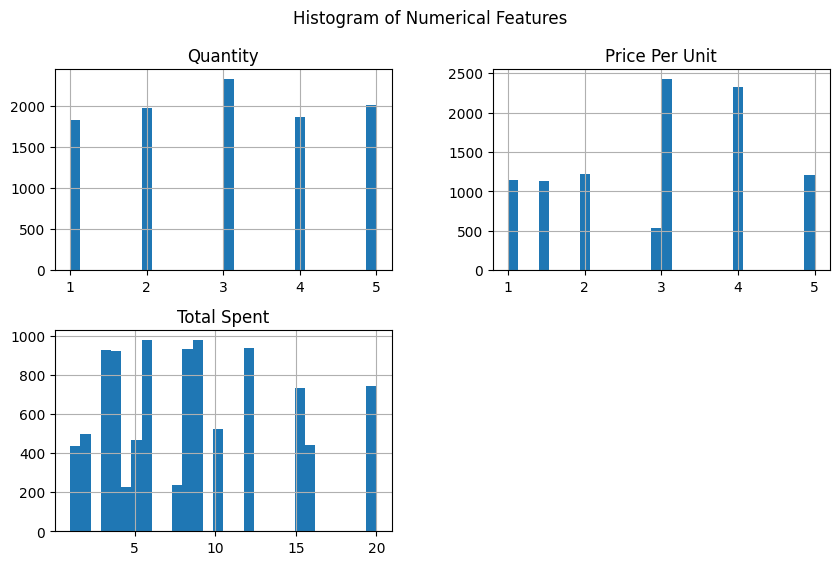

In [ ]:
#Histogram
import matplotlib.pyplot as plt
df[numerical_cols].hist(figsize=(10, 6), bins=30)
plt.suptitle("Histogram of Numerical Features")
plt.show()

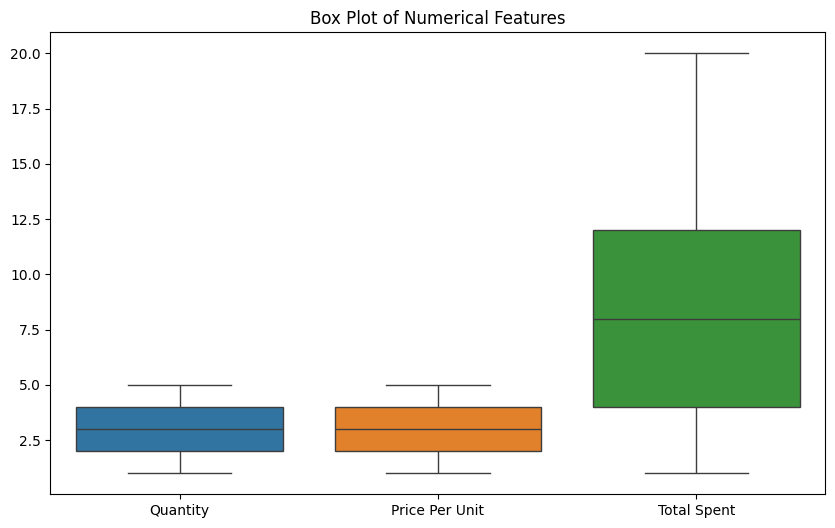

In [ ]:
# Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Numerical Features")
plt.show()

<Figure size 1000x500 with 0 Axes>

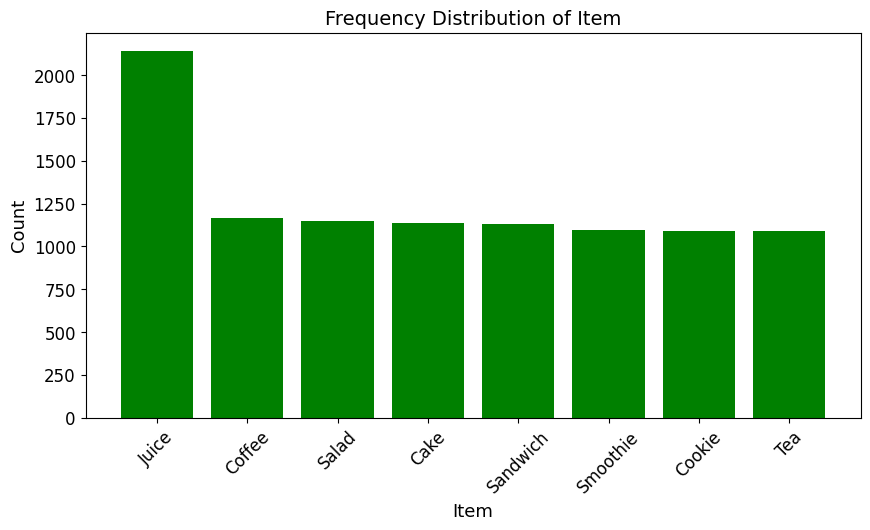

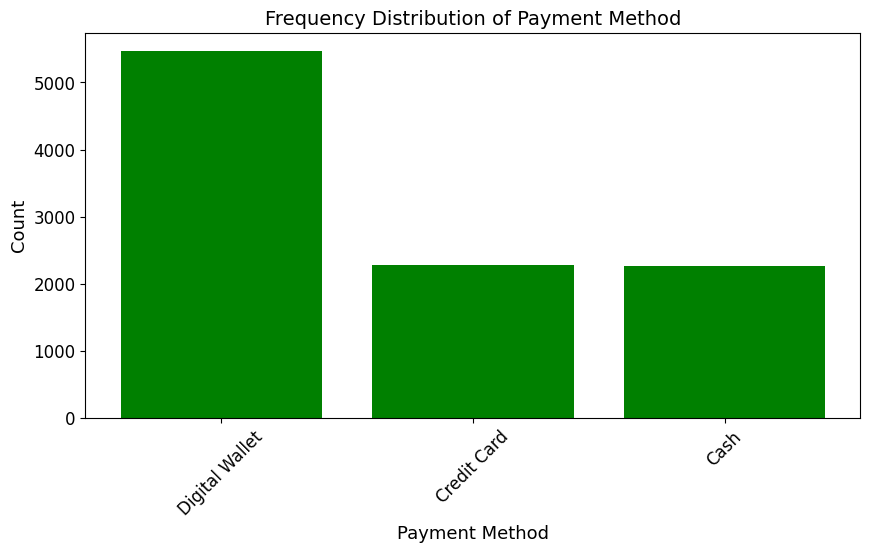

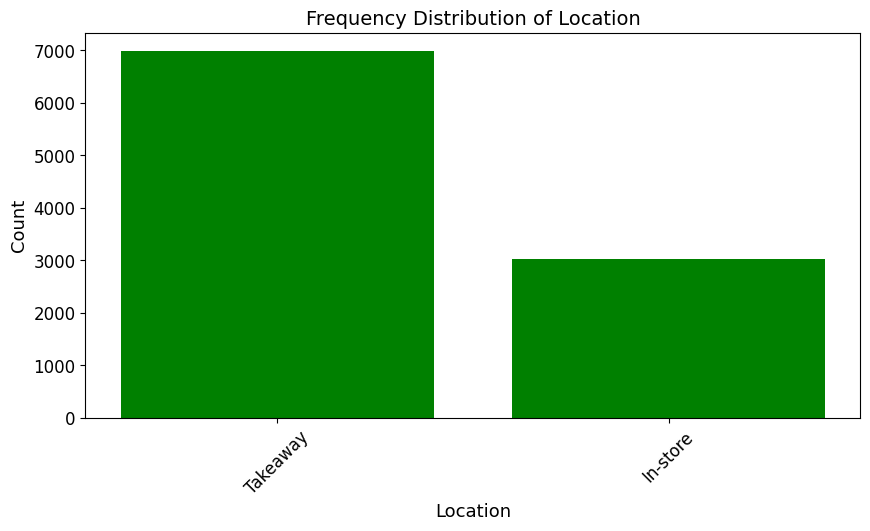

In [ ]:
#2)Categorical data
#frequency distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_cols = ['Item','Payment Method','Location']

# Set figure size
plt.figure(figsize=(10, 5))

# Loop through categorical columns and plot bar charts
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    value_counts = df[col].value_counts()

    # Bar plot
    plt.bar(value_counts.index, value_counts.values, color="green")

    # Titles and labels
    plt.title(f"Frequency Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Show plot
    plt.show()


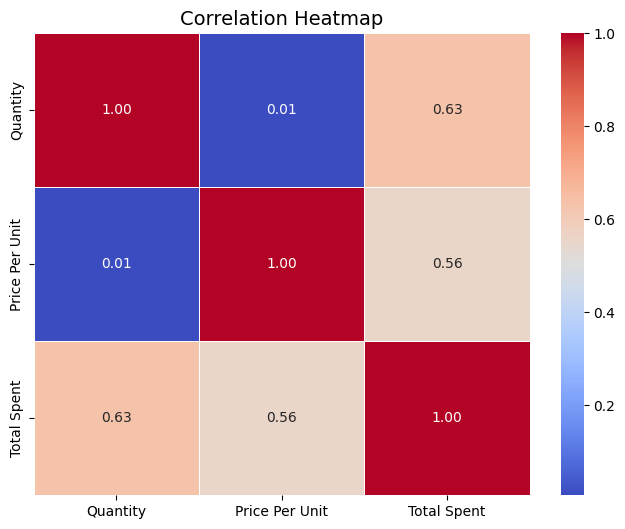

In [ ]:
#Bivariate Analysis:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


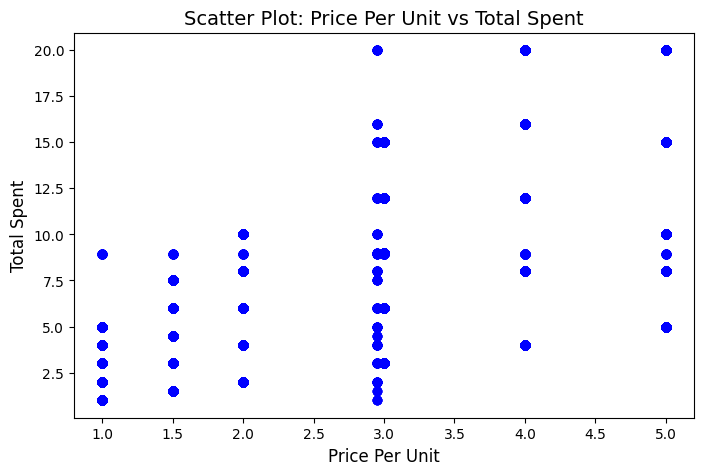

In [ ]:
#Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["Price Per Unit"], df["Total Spent"], color="blue", alpha=0.5)

# Titles and labels
plt.title("Scatter Plot: Price Per Unit vs Total Spent", fontsize=14)
plt.xlabel("Price Per Unit", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)

# Show plot
plt.show()


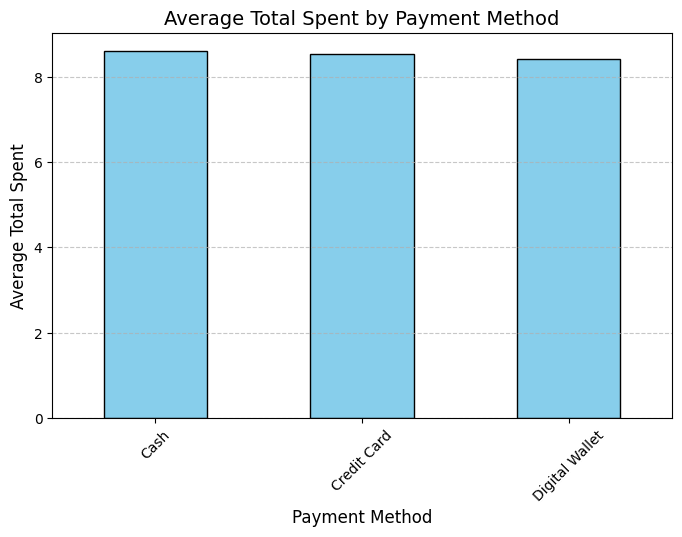

In [ ]:
#Bar plot(Mean Total Spent by Payment Method)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df.groupby("Payment Method")["Total Spent"].mean().plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average Total Spent by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Average Total Spent", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


<ipython-input-67-d3ccab2505cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Payment Method", y="Total Spent", palette="coolwarm")


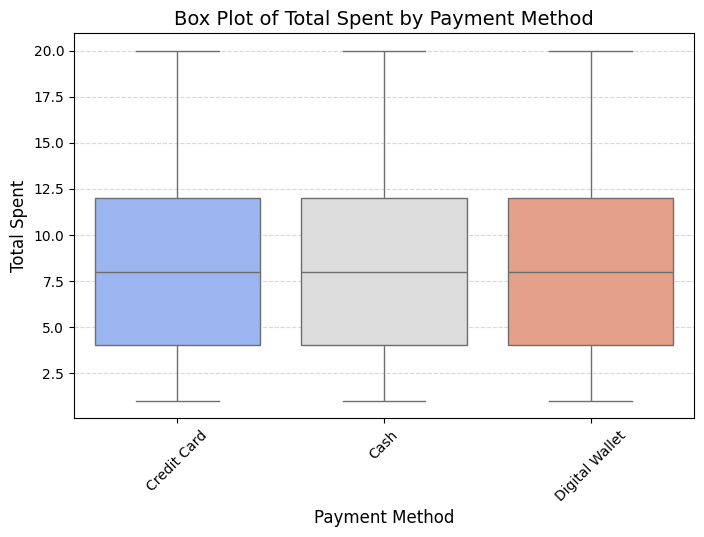

In [ ]:
#Box Plot (Total Spent by Payment Method)
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Payment Method", y="Total Spent", palette="coolwarm")

plt.title("Box Plot of Total Spent by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


<ipython-input-69-f7b424d10484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Payment Method", y="Total Spent", palette="viridis", inner="quartile")


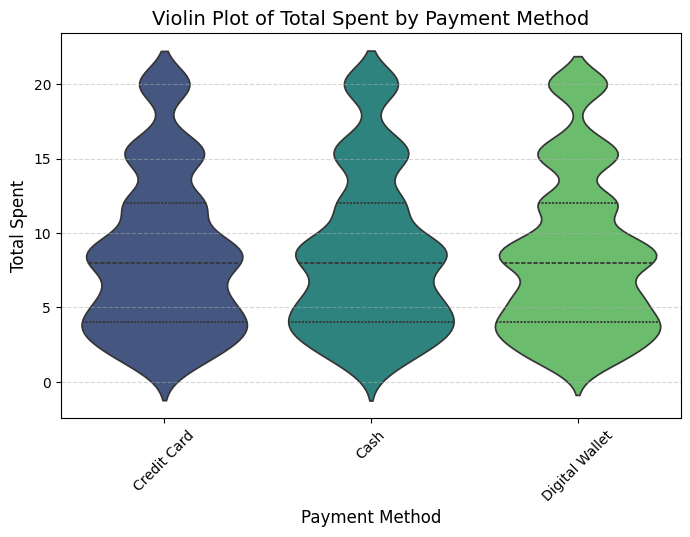

In [ ]:
#Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Payment Method", y="Total Spent", palette="viridis", inner="quartile")

plt.title("Violin Plot of Total Spent by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


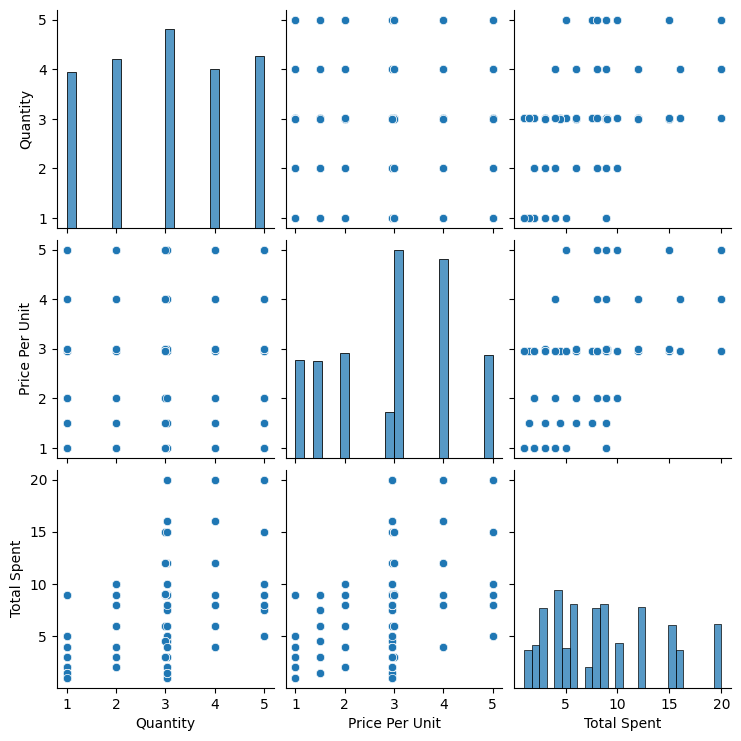

In [ ]:
#Multivariate Analysis:
#Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()


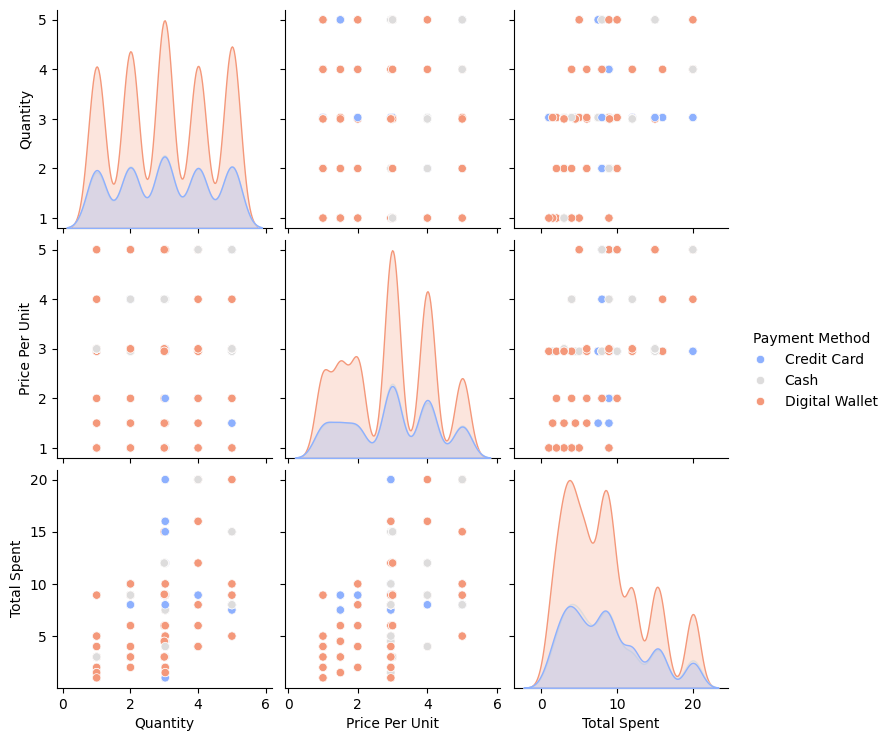

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue="Payment Method", palette="coolwarm")
plt.show()


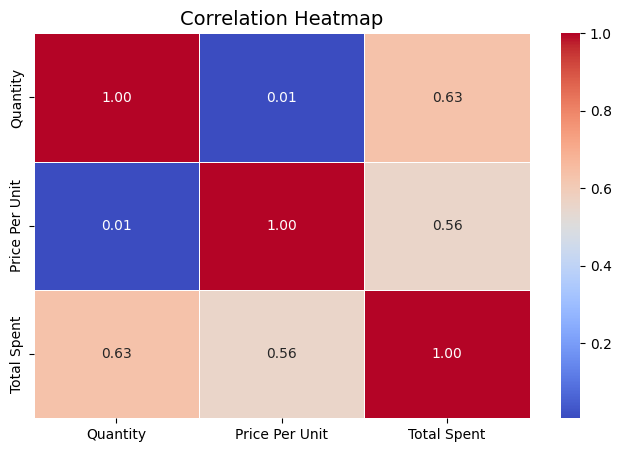

In [ ]:
#Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()


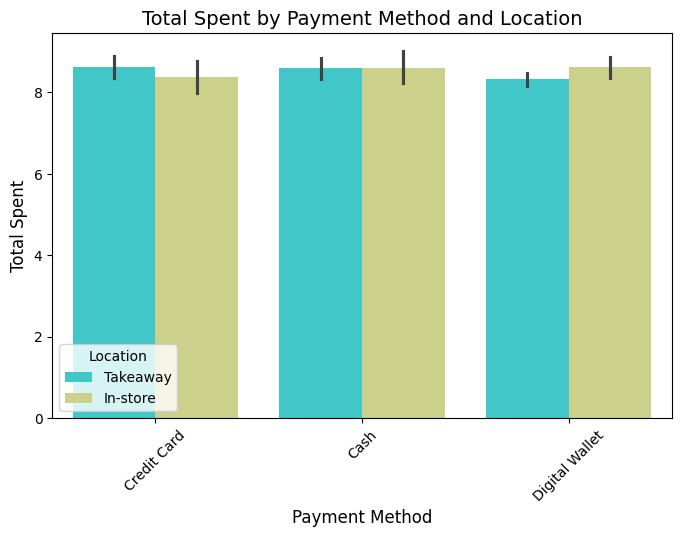

In [ ]:
#Grouped bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Payment Method", y="Total Spent", hue="Location", palette="rainbow")

plt.title("Total Spent by Payment Method and Location", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Location")

plt.show()


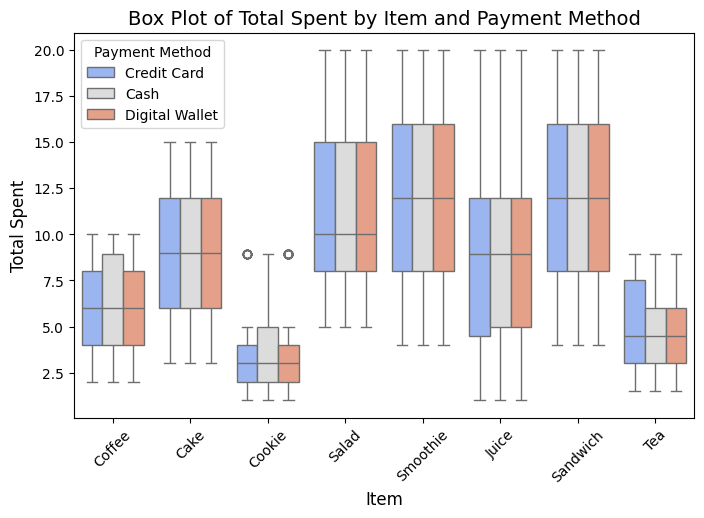

In [ ]:
#Grouped box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Item", y="Total Spent", hue="Payment Method", palette="coolwarm")

plt.title("Box Plot of Total Spent by Item and Payment Method", fontsize=14)
plt.xlabel("Item", fontsize=12)
plt.ylabel("Total Spent", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Payment Method")

plt.show()


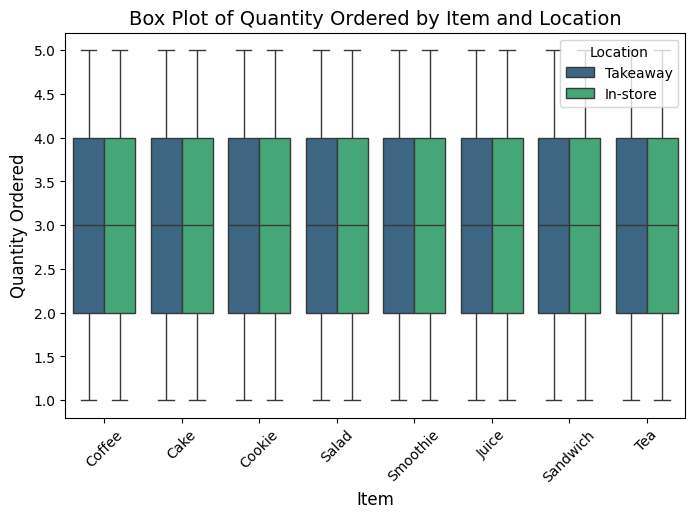

In [ ]:
#Grouped box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Item", y="Quantity", hue="Location", palette="viridis")

plt.title("Box Plot of Quantity Ordered by Item and Location", fontsize=14)
plt.xlabel("Item", fontsize=12)
plt.ylabel("Quantity Ordered", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Location",loc="upper right")

plt.show()
